We want to solve a 2-d problem with Gaussian increments over time and Laplacian increments over trials, with loss function (negative log-likelihood):
\begin{equation}
L(x,z;\Delta N) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -\Delta N_{k,r} \, (x_k + z_r) + \log(1+e^{x_k + z_r}) \right] + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 + \lambda \sum\limits_{r=2}^{R} |z_r - z_{r-1}|
\end{equation}

The MAP estimation problem for this model solves
\begin{equation}
\min_{x,z} \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -\Delta N_{k,r} \, (x_k + z_r) + \log(1+e^{x_k + z_r}) \right] + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 + \lambda \sum\limits_{r=2}^{R} |z_r - z_{r-1}|
\end{equation}
where $x = (x_1,..., x_K)'$, $z = (z_1,..., z_R)'$

Consider 
\begin{equation}
Q(x, z; x^{(l)}, z^{(l)}) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} E(w_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})\frac{(E(\tilde y_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})-(x_k+z_r))^2}{2} + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 + \sum\limits_{r=1}^{R}\frac{(z_r - z_{r-1})^2}{2}E(\frac{1}{z_r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})
\end{equation}
with
\begin{equation}
E(\tilde y_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)}) = \frac{\Delta N_{k,r} - 1/2}{E(w_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})}.
\end{equation}

where
$E(w_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)}) = \frac{1}{2(x_k^{(l)} + z_r^{(l)})} \tanh ((x_k^{(l)} + z_r^{(l)})/2)$
and 
$E(\frac{1}{z_r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)}) = \frac{\lambda}{|x_k^{(l)} - z_r^{(l)}|}$

We propose to solve this optimization problem using an iterative algorithm: starting with an initial guess $x^{(0)}, z^{(0)}$, we find the solution of the above equation by iteratively solving for 

\begin{equation}
x^{(l+1)} = \arg \min _x Q(x, z^{(l)}; x^{(l)}, z^{(l)})
\end{equation}

\begin{align}
Q(x, z^{(l)}; x^{(l)}, z^{(l)}) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} -(\Delta N_{k,r} - 1/2)(x_k + z_r^{(l)}) + \frac{(x_k + z_r^{(l)})^2}{2}\frac{1}{2(x_k^{(l)} + z_r^{(l)})} \tanh ((x_k^{(l)} + z_r^{(l)})/2) + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 
\end{align}

This is because
\begin{align}
Q'(x, z^{(l)}; x^{(l)}, z^{(l)}) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} E(w_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})(\frac{(E(\tilde y_{k,r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})-(x_k+z_r^{(l)}))^2}{2} + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 + \sum\limits_{r=1}^{R}\frac{(z_r^{(l)} - z_{r-1}^{(l)})^2}{2}E(\frac{1}{z_r}|\Delta N_{k,r}, x_k^{(l)}, z_r^{(l)})
\end{align}

and
\begin{equation}
z^{(l+1)} = \arg \min _z Q(z; x^{(l+1)}, z^{(l)})
\end{equation}


\begin{equation}
Q(z; x^{(l)}, z^{(l)}) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} -(\Delta N_{k,r} - 1/2)(x_k^{(l)} + z_r) + \frac{(x_k^{(l)} + z_r)^2}{2}\frac{1}{2(x_k^{(l)} + z_r^{(l)})} \tanh ((x_k^{(l)} + z_r^{(l)})/2) + \lambda/2 \sum\limits_{r=2}^{R} \frac{(z_r - z_{r-1})^2}{|z^{(l)}_r - z^{(l)}_{r-1}|}
\end{equation}




let $x'_{k,r} = x_k + z_r^{(l)}$, 
$x'^{(l)} _{k,r} = x_k^{(l)} + z_r^{(l)}$,

\begin{equation}
f(x'_{k,r}) = \frac{1}{2} x'_{k,r} + \frac{1}{2} {x'_{k,r}}^2 \frac{1}{2(x'^{(l)}_{k,r})} \frac{\exp (x'^{(l)}_{k,r}) - 1}{\exp (x'^{(l)}_{k,r}) + 1} - \log(1 + \exp(x'_{k,r}))
\end{equation}

We could show $f(x'_{k,r}) $ attains its minimum at $x'^{(l)} _{k,r}$:
\begin{equation}
f'(x'_{k,r})) = \frac{1}{2} + x'_{k,r} \frac{1}{2(x'^{(l)}_{k,r})} \frac{\exp (x'^{(l)}_{k,r}) - 1}{\exp (x'^{(l)}_{k,r}) + 1} - \frac{\exp(x'_{k,r})}{(1 + \exp(x'_{k,r}))}.
\end{equation}

Solution of $f'(x'_{k,r})) = 0$: 0, $x'^{(l)} _{k,r}$, $-x'^{(l)} _{k,r}$. Assume $x'^{(l)} _{k,r} \neq 0$. $f(x'_{k,r}) - f(-x'_{k,r}) = 0$. Since $f$ is coercive, so $x'^{(l)} _{k,r}$ is one of the minimum points of $f$. Similar for the case when $x$ is fixed.

This property will be used in the following proof of (1).

Each iteration of this algorithm solves for the MAP estimate in a one-dimensional LGSSM.

We now show this sequence of iteratively reweighted Kalman smoothers converges to the solution $x^*$ and $z^*$ of $L(x,z;\Delta N)$.

According to [Lange, 1993], we could rewrite $L(x,z;\Delta N)$ and $Q(z; x^{(l)}, z^{(l)})$ as
\begin{equation}
L(x,z;\Delta N) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -\Delta N_{k,r} \, (x_k + z_r) + \log(1+e^{x_k + z_r}) \right] + \frac{1}{2\sigma} \sum\limits_{k=2}^{K} (x_k - x_{k-1})^2 + \frac{1}{2} k(\delta^2(z_r))
\end{equation}

and

\begin{equation}
Q(z; x^{(l)}, z^{(l)}) = \sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} -(\Delta N_{k,r} - 1/2)(x_k^{(l)} + z_r) + \frac{(x_k^{(l)} + z_r)^2}{2}\frac{1}{2(x_k^{(l)} + z_r^{(l)})} \tanh ((x_k^{(l)} + z_r^{(l)})/2)  + \frac{1}{2} k'(\delta^2(z^{(l)}_r)) (z_r - z_{r-1})' \Sigma_z^{-1} (z_r - z_{r-1}) 
\end{equation}

Since $Q(z; x^{(l+1)}, z^{(l)})$ is quadratic, we could attain its minimum $z^{(l+1)}$ at one step. Similarly for $Q(x; x^{(l)}, z^{(l)})$. 

We want to show that 

(1)$\{(x^{(l)}, z^{(l)})\}_{l=1}^{\infty}$ is bounded, 

(2)there exists $\bar z = \lim_{l \rightarrow \infty} z^{(l)} $ and $\bar x = \lim_{l \rightarrow \infty} x^{(l)} $

and (3) $(\bar x, \bar z)$ is also the stationary point of $L(x,z;\Delta N)$:

(1) From [Lange, 1993], $\frac{1}{2} k'(\delta^2(z^{(l)}_r)) z_r' \Sigma_z^{-1} z_r - \frac{1}{2} k(\delta^2(z_r))$ is strictly convex and attains its minimum at $z^{(l)}$. Therefore $-\frac{1}{2} k'(\delta^2(z^{(l)}_r)) z_r' \Sigma_z^{-1} z_r + \frac{1}{2} k(\delta^2(z_r))$ attains its maximum at $z^{(l)}$. Similar for $x^{(l)}$. This implies:

\begin{align}
L(x^{(l)},z^{(l)};\Delta N) &= Q(x^{(l)}; x^{(l)}, z^{(l)}) + L(x^{(l)},z^{(l)};\Delta N)- Q(x^{(l)}; x^{(l)}, z^{(l)})\\
&\ge Q(x^{(l)}; x^{(l)}, z^{(l)}) + L(x^{(l+1)},z^{(l)};\Delta N) - Q(x^{(l+1)}; x^{(l)}, z^{(l)})\\
&\ge Q(x^{(l+1)}; x^{(l)}, z^{(l)}) + L(x^{(l+1)},z^{(l)};\Delta N) - Q(x^{(l+1)}; x^{(l)}, z^{(l)})\\
&= L(x^{(l+1)},z^{(l)};\Delta N)\\
&= Q(z^{(l)}; x^{(l+1)}, z^{(l)}) + L(x^{(l+1)},z^{(l)};\Delta N) - Q(z^{(l)}; x^{(l+1)}, z^{(l)})\\
&\ge Q(z^{(l)}; x^{(l+1)}, z^{(l)}) + L(x^{(l+1)},z^{(l+1)};\Delta N) - Q(z^{(l+1)}; x^{(l+1)}, z^{(l)})\\
&\ge Q(z^{(l+1)}; x^{(l+1)}, z^{(l)}) + L(x^{(l+1)},z^{(l+1)};\Delta N) - Q(x^{(l+1)}; x^{(l+1)}, z^{(l)})\\
&= L(x^{(l+1)},z^{(l+1)};\Delta N)
\end{align}

Using the similar argument in "Robust Estimation of State-Space Models by Iterative $l_2$ Approximations", we could show $L(x,z;\Delta N)$ is coercive and therefore there exists a convergent subsequence of $\{(x^{(l)}, z^{(l)})\}_{l=1}^{\infty}$. (coercive then compact, then bounded, Bolzano-Weierstrass)


(3)The optimality condition for $z^{(l+1)}$ of  $Q(z; x^{(l+1)}, z^{(l)})$ is 

\begin{equation}
\nabla_z Q(z; x^{(l+1)}, z^{(l)}) |_{z^{(l+1)}} = 0
\end{equation}

This is equivalent to 
\begin{equation}
\sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -(\Delta N_{k,r} - 1/2) + (x_k^{(l)} + z_r)\frac{1}{2(x_k^{(l)} + z_r^{(l)})} \tanh ((x_k^{(l)} + z_r^{(l)})/2) \right] + k'(\delta^2(z_r^{(l)}))\Sigma_z^{-1} z_r |_{z^{(l+1)}} = 0
\end{equation}

Taking limits and invoking continuity
\begin{equation}
\sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -\Delta N_{k,r} + \frac{e^{\bar x_k + z_r}}{(1+e^{\bar x_k + z_r})} \right]  + k'(\delta^2(z_r))\Sigma_z^{-1} z_r |_{\bar z} = 0
\end{equation}

We could prove the same result of $Q(x; x^{(l)}, z^{(l)})$ using the similar argument.

On the other hand, every stationary point of $(x^*,z^*)$ of$L(x,z;\Delta N)$ satisfies the first order necessary conditions

\begin{equation}
\nabla_z L(x^*, z; \Delta N) |_{z^*}= 0
\end{equation}


\begin{equation}
\sum\limits_{k=1}^{K} \sum\limits_{r=1}^{R} \left[ -\Delta N_{k,r} + \frac{e^{x^*_k + z_r}}{(1+e^{x^*_k + z_r})} \right]  + k'(\delta^2(z_r))\Sigma_z^{-1} z_r |_{z^*} = 0
\end{equation}

Similar for x*.

Using the similar argument in "Robust Estimation of State-Space Models by Iterative $l_2$ Approximations", we could show $L(x,z;\Delta N)$ is concave. Therefore there exists a unique minimizer $(x^*,z^*)$ of $L(x,z;\Delta N)$.

In [1]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.linalg
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
def Do_Kalman_Likelihood(y, sigma2obs, sigma2e, x0):
    """MAP solution, inverse covariance matrix, and marginal loglikelihood of state-space model

    :param y: Observations (K,)
    :param sigma2obs: Variance of observation noise (vector)
    :param sigma2e: Variance of process noise (vector: sigma2e[i] variance of x[i] - x[i-1])
    :param x0: Initial value of state
    :return: x_map, L, marginal_loglikelihood, joint_loglikelihood
    """
    # Build diagonals of information matrix
    assert(len(y) == len(sigma2obs) and len(y) == len(sigma2e))
    D = 1. / sigma2obs + 1. / sigma2e + np.concatenate((1. / sigma2e[1:], [0.]))
    B = -1. / sigma2e
    B[0] = 0.
    
    # Find Cholesky factorization of Hessian
    U = sp.linalg.cholesky_banded((B, D), lower=False)

    # Solve linear system
    G = y / sigma2obs
    G[0] += x0 / sigma2e[0]
    x_map = sp.linalg.cho_solve_banded([U, False], G)

    # Compute joint and marginal probabilities
    joint_loglikelihood = -.5 * ( np.sum(np.log(2*np.pi*sigma2e)) + np.sum(np.diff(x_map)**2 / sigma2e[1:])
                                                                  + (x_map[0] - x0)**2 / sigma2e[0]
                                + np.sum(np.log(2*np.pi*sigma2obs)) + np.sum((y - x_map)**2 / sigma2obs) )
    marginal_loglikelihood = len(y)/2. * np.log(2*np.pi) + joint_loglikelihood - np.sum(np.log(U[-1]))
    return x_map, U, marginal_loglikelihood, joint_loglikelihood

In [134]:
def Do_MM(DN, c, lam, sigma2x, sigma2x0, x0, sigma2z0, z0, max_iter=2000, tol=1e-8):
    """Find MAP solution of 2d model using MM

    :param dN: Observations (R,K,)
    :param c: Radius of Huber approximation to L1 norm
    :param lam: Coefficient of L1 penalization of changes along z
    :param sigma2x: Variance of x process noise
    :param sigma2x0: Variance of initial state x
    :param x0: Initial value of state x
    :param sigma2z0: Variance of initial state z
    :param z0: Initial value of state z
    :return: x_map, z_map, loglikelihood_map
    """
    # Initialize
    z = np.zeros((DN.shape[0],))
    x = np.zeros((DN.shape[1],))
    xz = x[None,:] + z[:,None]
    joint_loglikel = np.zeros(max_iter)
    # Iterate
    for i in range(max_iter):
        # Block MM over z
        #B = 1. / np.sum(1. / np.maximum(4., 2. + np.abs(xz)), axis=1)
        B = 1. / np.sum(1. / np.maximum(4, np.abs(xz-xz)), axis=1)
        A = np.sum(1. / (1. + np.exp(-xz)) - DN, axis=1)
        sigma2z = np.concatenate(([sigma2z0], np.maximum(c, np.abs(np.diff(z))) / lam))
        z = Do_Kalman_Likelihood(z - A*B, B, sigma2z, z0)[0]
        xz = x[None,:] + z[:,None]
        # Block MM over x
        #B = 1. / np.sum(1. / np.maximum(4., 2. + np.abs(xz)), axis=0)
        B = 1. / np.sum(1. / np.maximum(4, np.abs(xz-xz)), axis=0)
        A = np.sum(1. / (1. + np.exp(-xz)) - DN, axis=0)
        sigma2x_ = np.concatenate(([sigma2x0], np.ones(len(x)-1) * sigma2x))
        x = Do_Kalman_Likelihood(x - A*B, B, sigma2x_, x0)[0]
        xz = x[None,:] + z[:,None]
        # Compute likelihood
        joint_loglikel[i] = ( np.sum(DN * xz - np.log(1. + np.exp(xz))) - .5 * (
                           (len(x) - 1) * np.log(2*np.pi*sigma2x) + np.sum(np.diff(x)**2 / sigma2x)
                           + np.log(2*np.pi*sigma2x0) + (x[0] - x0)**2 / sigma2x0 
                           + np.log(2*np.pi*sigma2z0) + (z[0] - z0)**2 / sigma2z0 )
                           + np.log(lam/2.) - lam * np.sum(np.abs(np.diff(z))) )
        # Check convergence
        if i > 0 and joint_loglikel[i] - joint_loglikel[i-1] < tol * np.abs(joint_loglikel[i]):
            return x, z, joint_loglikel[:i+1]
    return x, z, joint_loglikel

<IPython.core.display.Javascript object>


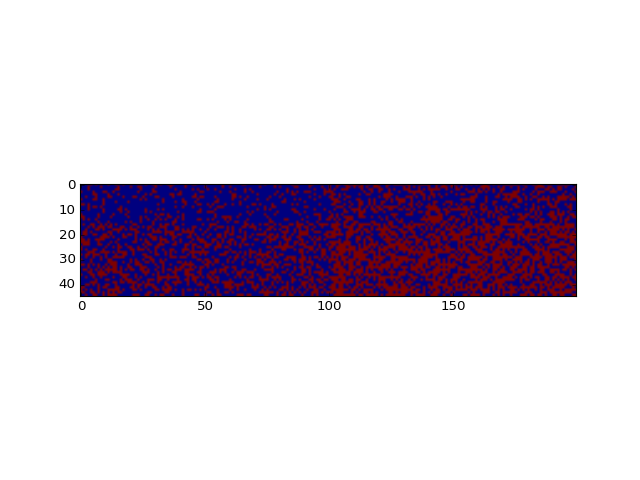

In [35]:
K = 200
R = 45
x = .1 + .2 * (np.arange(K) > 100)
z = .1 + .2 * (np.arange(R) > 15)
DN = (x[None,:] + z[:,None] > np.random.rand(R, K)).astype(float)
plt.figure()
plt.imshow(DN)

<IPython.core.display.Javascript object>


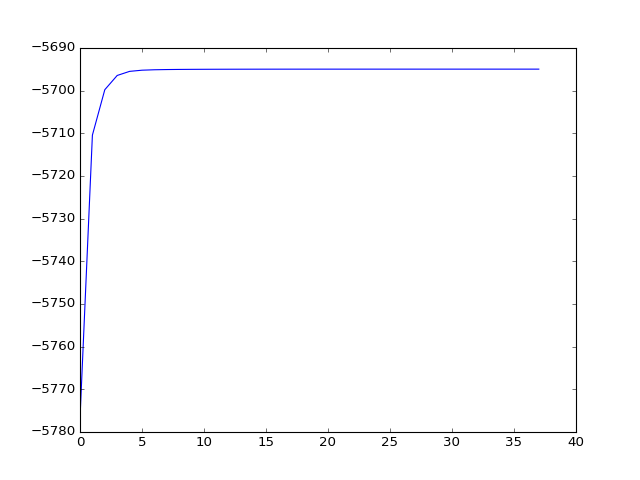

-5694.95328154


In [135]:
#%time
c = 1e-3
sigma2x = .1
sigma2x0 = 10
x0 = 0
sigma2z0 = 10
z0 = 0
lam = 10.
x, z, joint_loglikel = Do_MM(DN, c, lam, sigma2x, sigma2x0, x0, sigma2z0, z0)
plt.figure()
plt.plot(joint_loglikel)
print(joint_loglikel[-1])

<IPython.core.display.Javascript object>


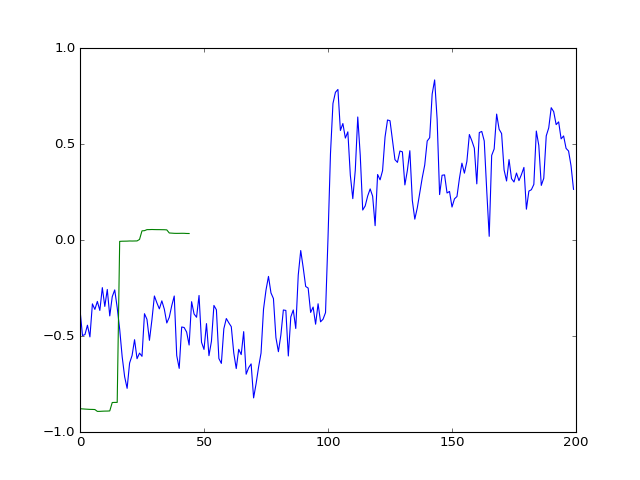

In [136]:
plt.figure()
plt.plot(x)
plt.plot(z)

In [121]:
joint_loglikel

array([-6194.61720064, -5848.87053148, -5799.37101779, ..., -5694.9515453 ,
       -5694.95154479, -5694.95154429])